# Linear Regression
## Simple Linear Regreesion

Linear relation ship with X and Y
\begin{equation}
Y \approx \beta_0 + \beta_1 X
\end{equation}

After using the training date, to get the estimated (predicted) Y on the basis of $X=x$, and hat symbol denote the estimated value 
\begin{equation}
\hat y = \hat \beta_0 + \hat \beta_1 x 
\end{equation}



###  Estimating the Coefficients (by using *least squares coefficient estimates*)

*Residual sum of squares* (RSS) as

$$RSS = e_1^2 + e_2^2 + \dots + e_n^2 
$$
where $e_i = y_i-\hat y_i$. Then expand it into

\begin{equation}
RSS = (y_1-\hat\beta_0-\hat \beta_1x_1)^2 + (y_2-\hat\beta_0-\hat \beta_1x_2)^2 + \dots + (y_n-\hat\beta_0-\hat \beta_1x_n)^2 = \sum_{i=1}^{n}(y_i-\hat\beta_0-\hat \beta_1x_i)^2
\end{equation}

After this, using the *least squares approach*, to calculate the condition to achieve minimal RSS
$$
\frac{\mathrm d RRS_{(\beta_0,\beta_1)}}{\mathrm d \beta_1} = 2 \left( \beta_1\sum_{i=1}^{n}x_i^2 -\sum_{i=1}^{n}(y_i-\beta_0)x_i \right)=0, \\
\frac{\mathrm d RRS_{(\beta_0,\beta_1)}}{\mathrm d \beta_0} = 2 \left( n \beta_0 -\sum_{i=1}^{n}(y_i-\beta_1x_i) \right)=0
$$

So, 
\begin{equation}
\hat\beta_1=\cfrac {\sum_{i=1}^{n}(x_i-\bar x)(y_i-\bar y)}{\sum_{i=1}^{n}(x_i-\bar x)^2}, \\
\hat\beta_0 = \bar y - \hat \beta_1 \bar x,
\end{equation}
Where $\bar x =\sum_{i=1}^{n}x_i$ and $\bar y =\sum_{i=1}^{n}y_i$, which are the mean value of samples.

In [23]:
# Import & Init Notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import seaborn as sns

from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
#import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn')

In [24]:
# Loading ad data
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


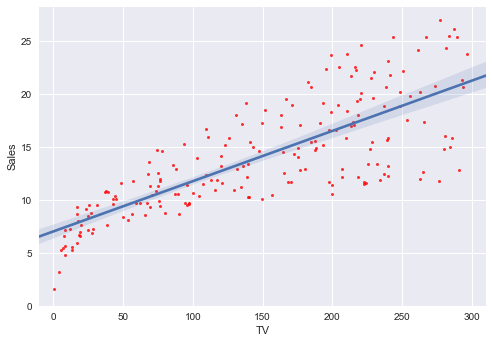

In [208]:
sns.regplot(advertising.TV, advertising.Sales, order=1, ci=95, scatter_kws={'color':'r', 's':9})

# Plot the errorbar directly on ax1
#ax.errorbar(np.arange(len(data["x"])), data["y"], yerr=data["s"])
plt.xlim(-10,310)
plt.ylim(ymin=0);

#### Figure 3.1 the least squares fit for the regression of sales onto TV 

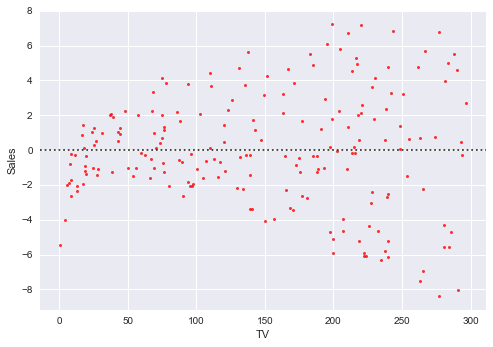

In [26]:
# Plot with the error
sns.residplot(advertising.TV, advertising.Sales, order=1, scatter_kws={'color':'r', 's':9})

In [27]:
# Regression coefficients (Ordinary Least Squares)
regr = skl_lm.LinearRegression()

X = scale(advertising.TV, with_mean=True, with_std=False).reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

# Create grid coordinates for plotting
B0 = np.linspace(regr.intercept_-2, regr.intercept_+2, 50)
B1 = np.linspace(regr.coef_-0.02, regr.coef_+0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (RSS) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] =((y - (xx[i,j]+X.ravel()*yy[i,j]))**2).sum()/1000
    
# Minimized RSS
min_RSS = r'$\beta_0$, $\beta_1$ for minimized RSS'
min_rss = np.sum((regr.intercept_+regr.coef_*X - y.values.reshape(-1,1))**2)/1000
min_rss


14.0225
[0.04753664]


2.1025305831313514

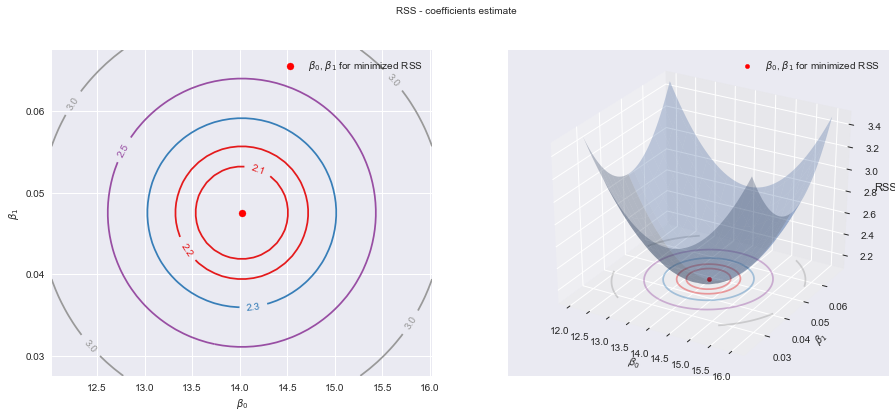

In [28]:
fig = plt.figure(figsize=(15,6))
fig.suptitle('RSS - coefficients estimate', fontsize=10)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, cmap=plt.cm.Set1, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax1.scatter(regr.intercept_, regr.coef_[0], c='r', label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt='%1.1f')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, Z, zdir='z', offset=Z.min(), cmap=plt.cm.Set1,
            alpha=0.4, levels=[2.15, 2.2, 2.3, 2.5, 3])
ax2.scatter3D(regr.intercept_, regr.coef_[0], min_rss, c='r', label=min_RSS)
ax2.set_zlabel('RSS')
ax2.set_zlim(Z.min(),Z.max())
ax2.set_ylim(0.02,0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\beta_0$', fontsize=10)
    ax.set_ylabel(r'$\beta_1$', fontsize=10)
    ax.set_yticks([0.03,0.04,0.05,0.06])
    ax.legend()

#### Figure 3.2 Contour and three-dimensional plots of the RSS 

### Assessing the accuary of Coefficient Esitimates

Releaship with error as below, and  $\beta_0$ stands for incercept term and $\beta_1$ stands for slope.

\begin{equation}
Y=\beta_0+\beta_1X+\epsilon
\end{equation}

Created a 100 random $X_s$,, and generated 100 corresponding $Y_s$ from the model

\begin{equation}
Y=2+3X+\epsilon
\end{equation}

In [215]:
x = np.random.uniform(-2,2,100)
rand = np.random.random_sample(size=100)
df1= pd.DataFrame({'x': x, 'y': 2+3*x,"Est.":0})
df = pd.DataFrame({'x': x, 'y': 2+3*x + np.random.random()*x*x+rand*2,"Est.":1})


all = df.append(df1)
all.set_index("x")
#(df1.y-df.y)/df.x

#all.info()


,y,Est.
x,,
0.367181,4.137640,1
0.240204,3.194187,1
-0.918180,1.564665,1
-0.947646,1.619123,1
1.163671,7.188273,1
-0.582600,1.255610,1
0.595109,5.391311,1
1.773233,9.479593,1
0.079875,3.104619,1


/Users/marcia/.virtualenvs/py3ml/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


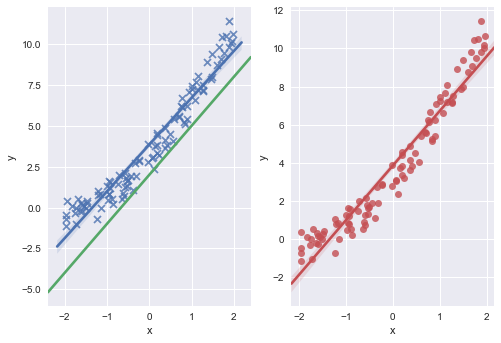

In [217]:
# Create a figure instance, and the two subplots
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

# Tell pointplot to plot on ax1 with the ax argument
#sns.pointplot(x="x", y="y", data=data, ax=ax1)
#sns.lmplot(x="x",y = "y", data=all, hue="Est.", palette="Set1", ax=ax1)
sns.regplot(x="x",y = "y", data=df,  ax=ax1, marker="x")
sns.regplot(x="x",y = "y", data=df1,  ax=ax1, marker='')

# Tell the factorplot to plot on ax2 with the ax argument
# Also store the FacetGrid in 'g'
#g=sns.factorplot(x="x", y="y", data=data, ax=ax2)
sns.regplot(x="x", y="y", data=df, ax=ax2);

# Close the FacetGrid figure which we don't need (g.fig)
#plt.close(g.fig)
plt.show()



#### Figure 3.3 Real vs Estimated
Left: The red line represents the true rela- tionship & Right: The population regression line is again shown in red, and the least squares line in dark blue. 

Computing the *standard error* by using $\hat \mu$ based on $SE(\hat\mu)$:
\begin{equation}
Var(\hat \mu) = SE(\hat \mu)^2 = \cfrac{\sigma^2}{n}
\end{equation}

The same, the *standard error* of $\hat \beta_0$ and $\hat \beta_1$ could be derived from:
\begin{equation}
SE(\hat \beta_0)^2 = \sigma^2\left[\cfrac{1}{n}+\cfrac{\bar x^2}{\sum_{i=1}^{n}(x_i-\bar x)^2}\right], SE(\hat \beta_1)^2 = \cfrac{\sigma^2}{\sum_{i=1}^{n}(x_i-\bar x)^2}
\end{equation}

Based on that the $RSE = \sqrt{RSS/(n-2)}$ RSE stands *residual standard error*.

The *confidential intervals* could be estimated by SE, For linear regression 95% confidence interval for $\beta_1$ is approximately takes the form:

\begin{equation}
\hat\beta_1\pm 2* SE(\hat\beta_1)
\end{equation}

In that case, the 95% chance that the interval
\begin{equation}
\left[\hat\beta_1- 2\cdot SE(\hat\beta_1), \space \hat\beta_1+2\cdot SE(\hat\beta_1)\right]
\end{equation}

Will contain the true value of $\beta_1$. Similarly, a confidence interval for \beta_0 is app. takes the form
\begin{equation}
\hat\beta_0\pm 2* SE(\hat\beta_0)
\end{equation}

Then, we use *t-statistic* to do the *null hypothesis* test, which means if $$H_0: \beta_1=0$$ then there is not relationship between X and Y; other wise if $$H_a: \beta_1\ne0,$$ means there are relationsip between X and Y. And in practice we compute *t-statistic* given by:

\begin{equation}
t=\frac{\hat\beta_1-0}{SE(\hat\beta_1)}
\end{equation}


In [224]:
est = smf.ols('Sales ~ TV', advertising).fit()
est.summary().tables[1]
#est.summary()

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [226]:
# RSS with regression coefficients
((advertising.Sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()/1000

2.1025305831313514

In [233]:
regr = skl_lm.LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.Sales

regr.fit(X,y)
print("Coefficient is", regr.intercept_)
print("Std. Error is", regr.coef_[0])



Coefficient is 7.032593549127695
Std. Error is 0.04753664043301975


In [ ]:
#R^2
Sales_pred = regr.predict(X)
r2_score(y, Sales_pred)